<b>¡Hola Viridiana!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# Proyecto final Sprint 12

En esta ocasión ayudaremos a una compañía minera a preparar un prototipo de un modelo de machine learning para predecir la cantidad de oro extraído del mineral de oro y optimizar la producción.

## Exploración de los datos

In [1]:
#Importación de librerías para nuestro proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Carga de datasets y exploración de los contenidos
df_train = pd.read_csv('/datasets/gold_recovery_train.csv') 
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [6]:
display(df_train.shape)
display(df_test.shape)
display(df_full.shape)

(16860, 87)

(5856, 53)

(22716, 87)

In [7]:
display(df_train.describe())
display(df_test.describe())
display(df_full.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [8]:
display((df_full.duplicated().sum(), df_train.duplicated().sum(), df_test.duplicated().sum()))


(0, 0, 0)

# Cálculo de la recuperación
 
 La fórmula para la recuperación es: R = C*(F-T)/(F*(C-T))*100%
 donde:
 C - Concentración del metal en el concentrado
 F - Concentración del metal en la alimentación
 T - Concentración del metal en los residuos

 

In [9]:
# Función para calcular la recuperación
def recovery(df, C, F, T):
    rec = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return rec

vals_pred = recovery(df_train.dropna(subset=['rougher.output.recovery']), 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
vals_act = df_train['rougher.output.recovery'].dropna().to_list()

display(f'Error Absoluto Medio (EAM): {mean_absolute_error(vals_act, vals_pred)}')

'Error Absoluto Medio (EAM): 9.303415616264301e-15'

<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
¡Excelente trabajo al implementar la fórmula de recuperación y compararla con los valores reales! Además, el uso del Error Absoluto Medio es apropiado y está bien justificado. Esto demuestra una comprensión sólida tanto del contexto del problema como de la validación de datos.
</div>

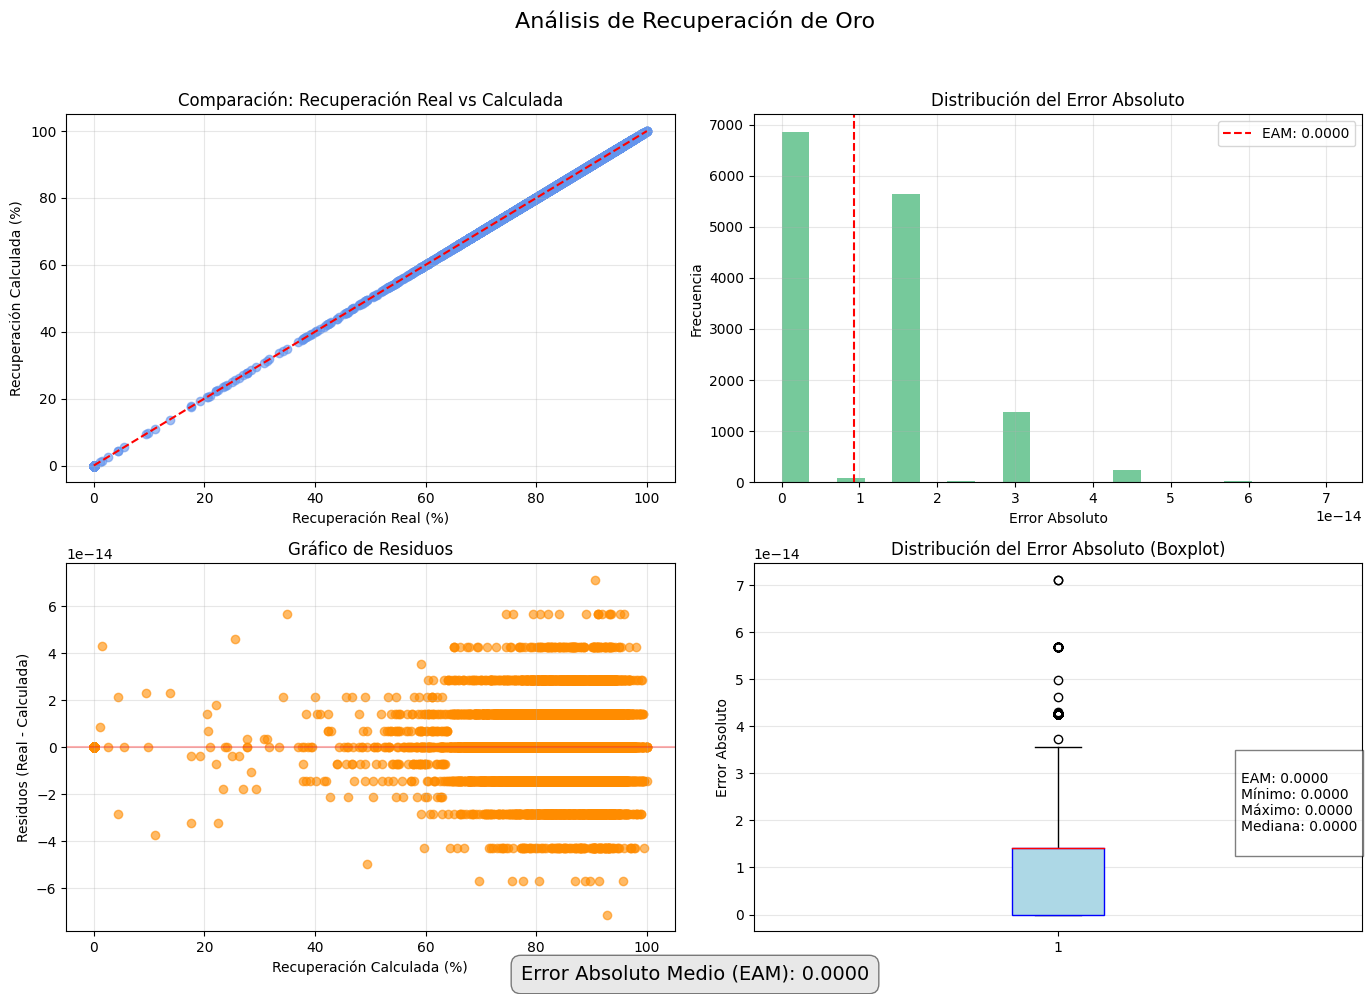


Estadísticas del Error Absoluto:
count    1.428700e+04
mean     9.303416e-15
std      1.051342e-14
min      0.000000e+00
25%      0.000000e+00
50%      1.421085e-14
75%      1.421085e-14
max      7.105427e-14
Name: Error Absoluto, dtype: float64


In [10]:
mae = mean_absolute_error(vals_act, vals_pred)  

results_df = pd.DataFrame({
    'Recuperación Real': vals_act,
    'Recuperación Calculada': vals_pred,
    'Error Absoluto': np.abs(np.array(vals_act) - np.array(vals_pred))
})

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de Recuperación de Oro', fontsize=16)

axs[0, 0].scatter(vals_act, vals_pred, alpha=0.6, color='cornflowerblue')

min_val = min(min(vals_act), min(vals_pred))
max_val = max(max(vals_act), max(vals_pred))
axs[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--')
axs[0, 0].set_xlabel('Recuperación Real (%)')
axs[0, 0].set_ylabel('Recuperación Calculada (%)')
axs[0, 0].set_title('Comparación: Recuperación Real vs Calculada')
axs[0, 0].grid(True, alpha=0.3)

axs[0, 1].hist(results_df['Error Absoluto'], bins=20, color='mediumseagreen', alpha=0.7)
axs[0, 1].axvline(mae, color='red', linestyle='--', label=f'EAM: {mae:.4f}')
axs[0, 1].set_xlabel('Error Absoluto')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].set_title('Distribución del Error Absoluto')
axs[0, 1].legend()
axs[0, 1].grid(True, alpha=0.3)

residuos = np.array(vals_act) - np.array(vals_pred)
axs[1, 0].scatter(vals_pred, residuos, alpha=0.6, color='darkorange')
axs[1, 0].axhline(y=0, color='r', linestyle='-', alpha=0.3)
axs[1, 0].set_xlabel('Recuperación Calculada (%)')
axs[1, 0].set_ylabel('Residuos (Real - Calculada)')
axs[1, 0].set_title('Gráfico de Residuos')
axs[1, 0].grid(True, alpha=0.3)

axs[1, 1].boxplot(results_df['Error Absoluto'], patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='blue'),
                 medianprops=dict(color='red'))
axs[1, 1].set_ylabel('Error Absoluto')
axs[1, 1].set_title('Distribución del Error Absoluto (Boxplot)')
axs[1, 1].grid(True, alpha=0.3, axis='y')

stats_text = f"""
EAM: {mae:.4f}
Mínimo: {results_df['Error Absoluto'].min():.4f}
Máximo: {results_df['Error Absoluto'].max():.4f}
Mediana: {results_df['Error Absoluto'].median():.4f}
"""
axs[1, 1].text(1.3, results_df['Error Absoluto'].median(), stats_text, 
              bbox=dict(facecolor='white', alpha=0.5))


plt.tight_layout(rect=[0, 0, 1, 0.95])  


fig.text(0.5, 0.01, f'Error Absoluto Medio (EAM): {mae:.4f}', 
         ha='center', fontsize=14, 
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.show()

error_stats = results_df['Error Absoluto'].describe()
print("\nEstadísticas del Error Absoluto:")
print(error_stats)


<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Muy buena visualización del análisis de errores. Usar gráficos como scatter, histogramas y boxplots para representar la relación entre valores predichos y reales permite evaluar de forma clara la calidad de las estimaciones.
</div>


### Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [11]:
#Comparación entre columnas
df_difference = pd.DataFrame(df_train.columns.difference(df_test.columns))
display('Características no disponibles en el conjunto de prueba: \n', df_difference)

'Características no disponibles en el conjunto de prueba: \n'

,0
0,final.output.concentrate_ag
1,final.output.concentrate_au
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.recovery
5,final.output.tail_ag
6,final.output.tail_au
7,final.output.tail_pb
8,final.output.tail_sol
9,primary_cleaner.output.concentrate_ag


Las siguientes características corresponden a los conjuntos de datos de entrenamiento y prueba. Las 34 columnas listadas no están presentes en el conjunto de prueba y son de tipo flotante (Float64). Estas columnas se eliminarán del conjunto de entrenamiento después de evaluar el modelo seleccionado y utilizar el conjunto de prueba.
Los parámetros incluyen:
- concentrate 
- tail 
- pb_ratio 
- floatbank10_sulfate_to_au_feed y floatbank11_sulfate_to_au_feed 
- sulfate_to_au_concentrate 
- recovery (salidas)


# Preprocesamiento de datos

Previamente hicimos la búsqueda de valores duplicados así que haremos los siguientes pasos para limpiar los datos buscando valores ausentes

In [12]:
train_missing = df_train.isna().sum() / len(df_train) * 100
train_missing

date                                          0.000000
final.output.concentrate_ag                   0.427046
final.output.concentrate_pb                   0.427046
final.output.concentrate_sol                  2.194543
final.output.concentrate_au                   0.421115
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.504152
secondary_cleaner.state.floatbank5_b_air      0.504152
secondary_cleaner.state.floatbank5_b_level    0.498221
secondary_cleaner.state.floatbank6_a_air      0.610913
secondary_cleaner.state.floatbank6_a_level    0.504152
Length: 87, dtype: float64

In [13]:
test_missing = df_test.isna().sum() / len(df_test) * 100
test_missing

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [14]:
full_missing = df_full.isna().sum() / len(df_full) * 100
full_missing

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

In [15]:
#Manejo de valores ausentes
df_train = df_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).reset_index()
df_full = df_full.dropna(subset=['rougher.output.recovery', 'final.output.recovery']).reset_index()

In [16]:
df_train = df_train.fillna(df_train.median(numeric_only=True))
df_test = df_test.fillna(df_test.median(numeric_only=True))
df_full = df_full.fillna(df_full.median(numeric_only=True))

In [17]:
display(df_train.info())
display(df_test.info())
display(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               14149 non-null  int64  
 1   date                                                14149 non-null  object 
 2   final.output.concentrate_ag                         14149 non-null  float64
 3   final.output.concentrate_pb                         14149 non-null  float64
 4   final.output.concentrate_sol                        14149 non-null  float64
 5   final.output.concentrate_au                         14149 non-null  float64
 6   final.output.recovery                               14149 non-null  float64
 7   final.output.tail_ag                                14149 non-null  float64
 8   final.output.tail_pb                                14149 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   index                                               19439 non-null  int64  
 1   date                                                19439 non-null  object 
 2   final.output.concentrate_ag                         19439 non-null  float64
 3   final.output.concentrate_pb                         19439 non-null  float64
 4   final.output.concentrate_sol                        19439 non-null  float64
 5   final.output.concentrate_au                         19439 non-null  float64
 6   final.output.recovery                               19439 non-null  float64
 7   final.output.tail_ag                                19439 non-null  float64
 8   final.output.tail_pb                                19439 non-null  float64


None

# Análisis de datos

## Cambios en la concentración de metales por etapa de purificación

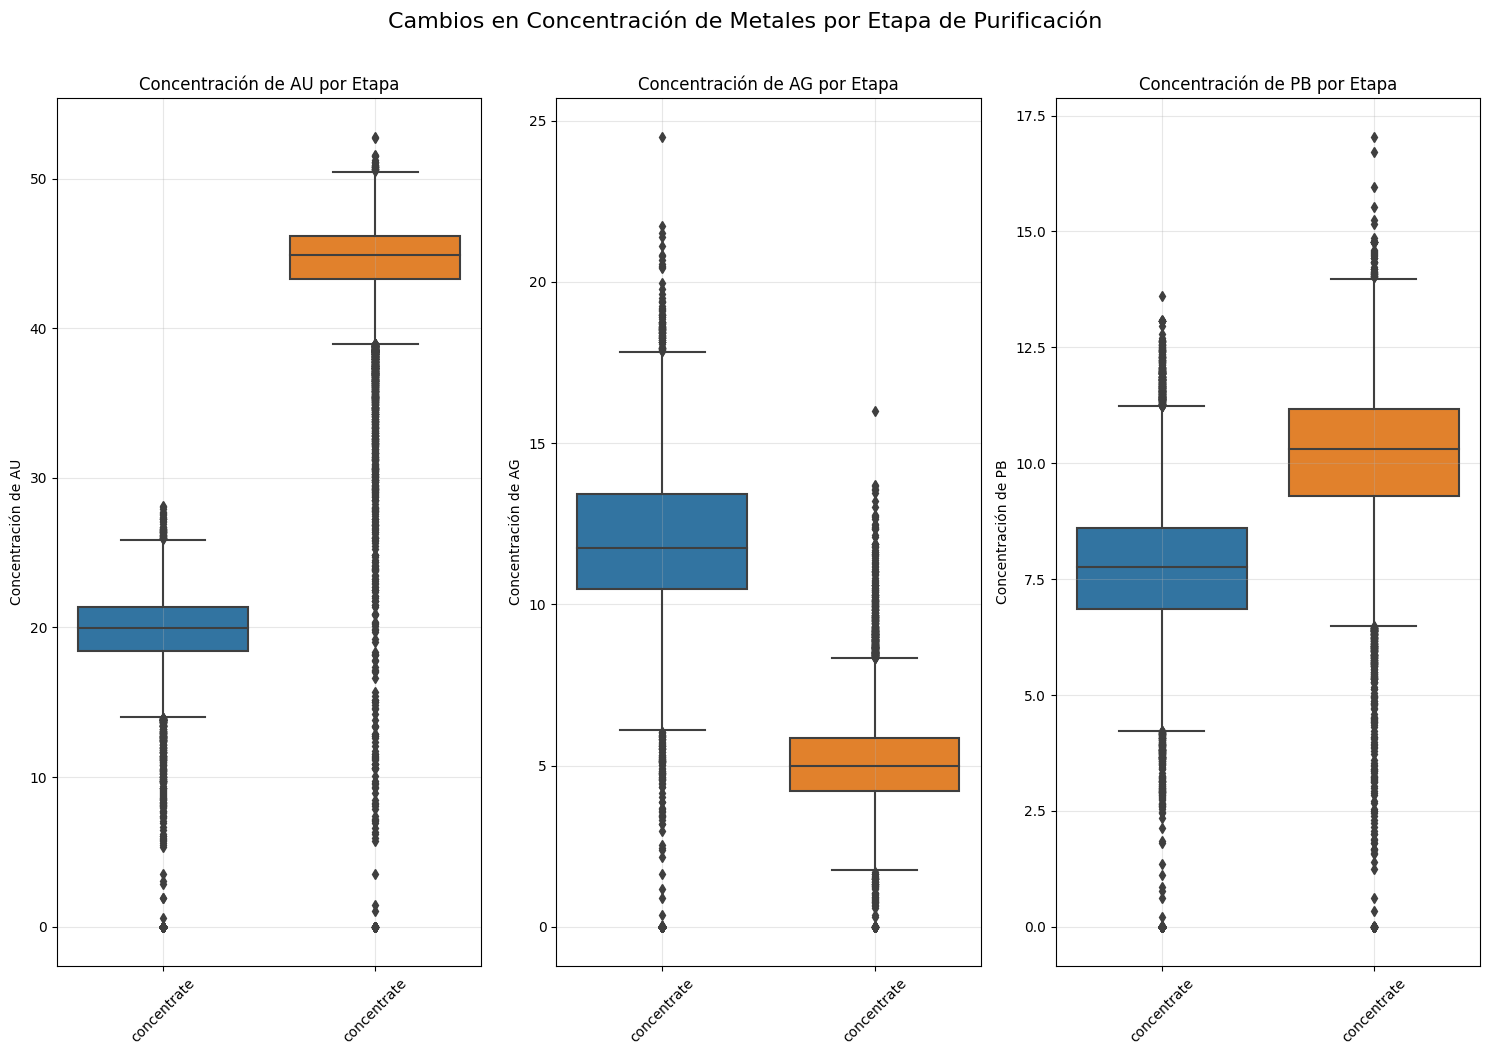

Estadísticas de concentración por metal y etapa:

--- AU ---

Etapa: rougher.output.concentrate
count    14149.000000
mean        19.439958
std          3.765192
min          0.000000
25%         18.432161
50%         19.947312
75%         21.392714
max         28.146838
Name: rougher.output.concentrate_au, dtype: float64

Etapa: final.output.concentrate
count    14149.000000
mean        44.003792
std          4.905261
min          0.000000
25%         43.276111
50%         44.872436
75%         46.166425
max         52.756638
Name: final.output.concentrate_au, dtype: float64

--- AG ---

Etapa: rougher.output.concentrate
count    14149.000000
mean        11.775812
std          2.731747
min          0.000000
25%         10.486871
50%         11.747362
75%         13.426419
max         24.480271
Name: rougher.output.concentrate_ag, dtype: float64

Etapa: final.output.concentrate
count    14149.000000
mean         5.142023
std          1.369538
min          0.000000
25%          4.211660

In [18]:
# Definimos las etapas de purificación que queremos analizar
stages = ['input.feed', 'rougher.output.concentrate', 'final.output.concentrate']
metals = ['au', 'ag', 'pb']

plt.figure(figsize=(15, 10))

for i, metal in enumerate(metals):
    plt.subplot(1, 3, i+1)
    
    data = []
    labels = []
    
    for stage in stages:
      
        col_name = f"{stage}_{metal}"
        if col_name in df_train.columns:
            data.append(df_train[col_name].dropna())
            labels.append(stage.split('.')[-1])  
    
    if data:
        sns.boxplot(data=data)
        plt.title(f'Concentración de {metal.upper()} por Etapa')
        plt.ylabel(f'Concentración de {metal.upper()}')
        plt.xticks(range(len(labels)), labels, rotation=45)
        plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Cambios en Concentración de Metales por Etapa de Purificación', y=1.05, fontsize=16)
plt.show()

print("Estadísticas de concentración por metal y etapa:")
for metal in metals:
    print(f"\n--- {metal.upper()} ---")
    for stage in stages:
        col_name = f"{stage}_{metal}"
        if col_name in df_train.columns:
            stats = df_train[col_name].describe()
            print(f"\nEtapa: {stage}")
            print(stats)

<div class="alert alert-block alert-success">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
Excelente análisis exploratorio. Los gráficos de cajas por etapa de purificación son una herramienta valiosa para entender la evolución de la concentración de metales, y el resumen estadístico complementa muy bien la interpretación.
</div>


Estas estadísticas confirman que el proceso de purificación está funcionando según lo esperado para el objetivo principal (oro), mientras separa efectivamente metales no deseados como la plata. El comportamiento del plomo sugiere que podría ser un indicador útil para monitorear la eficiencia general del proceso.

## Comparación de distribuciones por tamaño de partículas

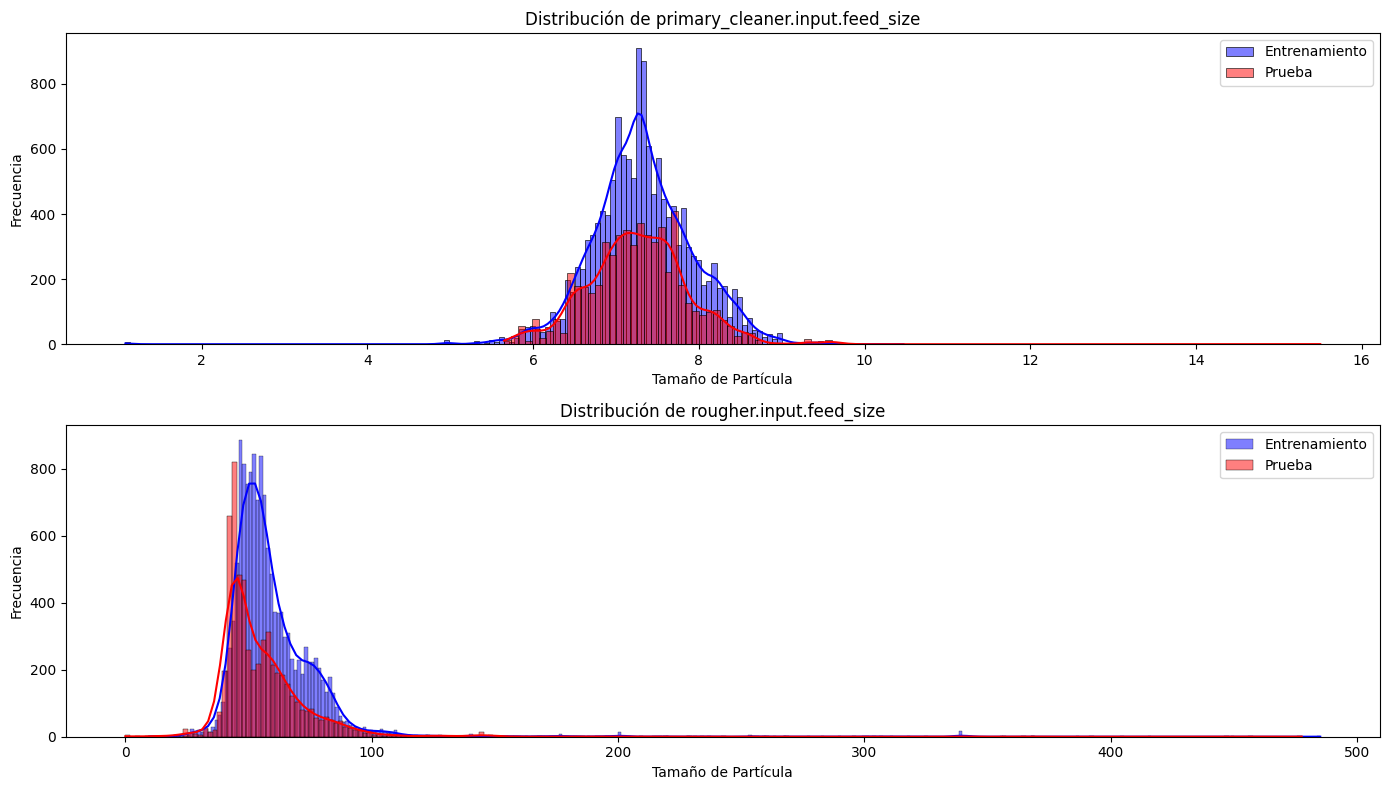

Prueba de Kolmogorov-Smirnov para comparar distribuciones:
primary_cleaner.input.feed_size: Estadístico KS = 0.0538, p-valor = 0.0000
  -> Las distribuciones son significativamente diferentes.
rougher.input.feed_size: Estadístico KS = 0.2431, p-valor = 0.0000
  -> Las distribuciones son significativamente diferentes.


In [19]:
size_cols = [col for col in df_train.columns if 'size' in col.lower()]

if size_cols:
    plt.figure(figsize=(14, 8))
    
    for i, col in enumerate(size_cols):
        if col in df_test.columns:  
            plt.subplot(len(size_cols), 1, i+1)
            
            sns.histplot(df_train[col].dropna(), color='blue', alpha=0.5, label='Entrenamiento', kde=True)
            sns.histplot(df_test[col].dropna(), color='red', alpha=0.5, label='Prueba', kde=True)
            
            plt.title(f'Distribución de {col}')
            plt.xlabel('Tamaño de Partícula')
            plt.ylabel('Frecuencia')
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    from scipy import stats
    
    print("Prueba de Kolmogorov-Smirnov para comparar distribuciones:")
    for col in size_cols:
        if col in df_test.columns:
            ks_stat, p_value = stats.ks_2samp(
                df_train[col].dropna(), 
                df_test[col].dropna()
            )
            print(f"{col}: Estadístico KS = {ks_stat:.4f}, p-valor = {p_value:.4f}")
            if p_value < 0.05:
                print("  -> Las distribuciones son significativamente diferentes.")
            else:
                print("  -> No hay evidencia de diferencias significativas.")

## Análisis de concentraciones totales y detección de anomalías

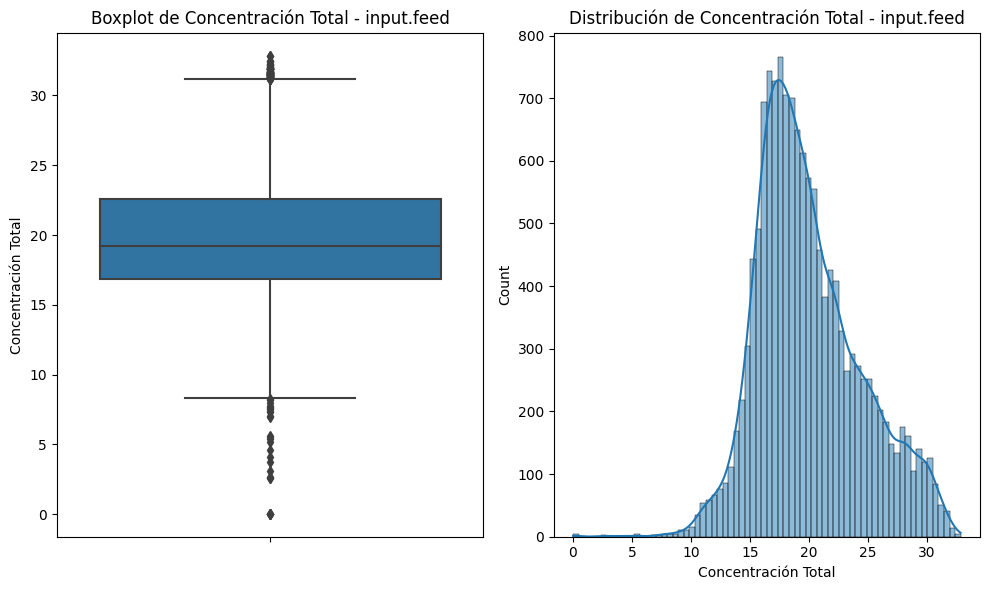


Análisis de valores anómalos para input.feed:
Rango normal: 8.2700 - 31.1526
Número de outliers detectados: 117
Porcentaje de outliers: 0.83%

Estadísticas de los outliers:
count    117.000000
mean      25.429400
std       11.448630
min        0.030000
25%       31.169315
50%       31.460646
75%       31.660794
max       32.840164
Name: input.feed_total_concentration, dtype: float64


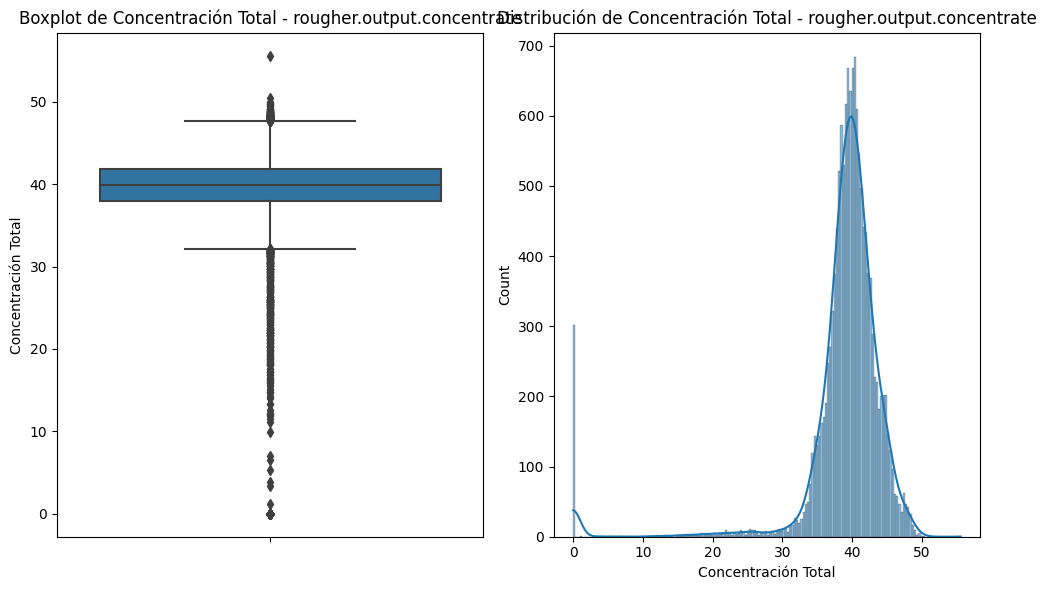


Análisis de valores anómalos para rougher.output.concentrate:
Rango normal: 32.1188 - 47.6036
Número de outliers detectados: 829
Porcentaje de outliers: 5.86%

Estadísticas de los outliers:
count    829.000000
mean      20.312787
std       17.997236
min        0.000000
25%        0.000000
50%       22.487880
75%       31.437792
max       55.568687
Name: rougher.output.concentrate_total_concentration, dtype: float64


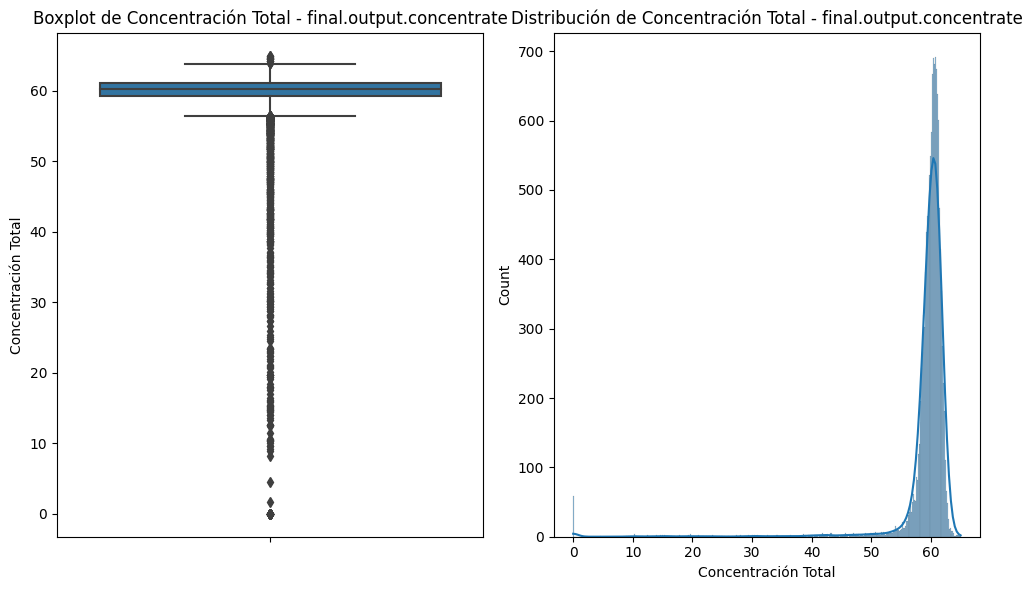


Análisis de valores anómalos para final.output.concentrate:
Rango normal: 56.4215 - 63.8348
Número de outliers detectados: 779
Porcentaje de outliers: 5.51%

Estadísticas de los outliers:
count    779.000000
mean      43.265933
std       17.145204
min        0.000000
25%       38.977128
50%       50.705095
75%       55.195821
max       64.968881
Name: final.output.concentrate_total_concentration, dtype: float64


In [20]:
# Definimos las etapas para analizar concentraciones totales
stages_total = ['input.feed', 'rougher.output.concentrate', 'final.output.concentrate']

# Cálculo de la suma de concentraciones para cada etapa
for stage in stages_total:
    
    conc_cols = [col for col in df_train.columns if stage in col and ('au' in col or 'ag' in col or 'pb' in col)]
    
    if conc_cols:
       
        total_col_name = f"{stage}_total_concentration"
        df_train[total_col_name] = df_train[conc_cols].sum(axis=1)
        
        plt.figure(figsize=(10, 6))
        
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df_train[total_col_name])
        plt.title(f'Boxplot de Concentración Total - {stage}')
        plt.ylabel('Concentración Total')
        
        plt.subplot(1, 2, 2)
        sns.histplot(df_train[total_col_name], kde=True)
        plt.title(f'Distribución de Concentración Total - {stage}')
        plt.xlabel('Concentración Total')
        
        plt.tight_layout()
        plt.show()
        
     
        Q1 = df_train[total_col_name].quantile(0.25)
        Q3 = df_train[total_col_name].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df_train[(df_train[total_col_name] < lower_bound) | 
                            (df_train[total_col_name] > upper_bound)]
        
        print(f"\nAnálisis de valores anómalos para {stage}:")
        print(f"Rango normal: {lower_bound:.4f} - {upper_bound:.4f}")
        print(f"Número de outliers detectados: {len(outliers)}")
        print(f"Porcentaje de outliers: {100 * len(outliers) / len(df_train):.2f}%")
        
        if len(outliers) > 0:
            print("\nEstadísticas de los outliers:")
            print(outliers[total_col_name].describe())
            
            outlier_indices = outliers.index

<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Muy bien aplicada la técnica de detección de outliers mediante el rango intercuartílico (IQR). La visualización y eliminación de valores anómalos mejora la calidad del conjunto de datos y es una excelente práctica de preprocesamiento.
</div>


### Los outliers podrían afectar el rendimiento de nuestros modelos, por lo que es mejor eliminarlos.

Tamaño del conjunto antes de eliminar outliers: 14149
Tamaño del conjunto después de eliminar outliers: 13370


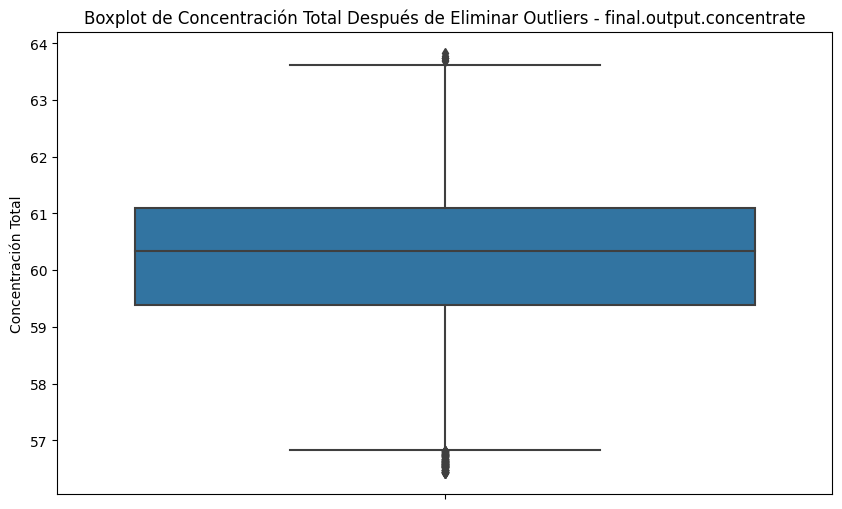

In [21]:
df_train_cleaned = df_train.drop(index=outlier_indices)
print(f"Tamaño del conjunto antes de eliminar outliers: {len(df_train)}")
print(f"Tamaño del conjunto después de eliminar outliers: {len(df_train_cleaned)}")

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_train_cleaned[total_col_name])
plt.title(f'Boxplot de Concentración Total Después de Eliminar Outliers - {stage}')
plt.ylabel('Concentración Total')
plt.show()

## Construcción del modelo

Usaremos la fórmula sMAPE = 25% sMAPE(rougher) + 75% sMAPE(final)

## Entrenamiento de diferentes modelos

In [22]:
# Función para calcular sMAPE individual
def calculate_smape(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    abs_diff = np.abs(y_true - y_pred)
    abs_avg = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    valid_entries = abs_avg != 0
    
    if not np.any(valid_entries):
        return 0.0
    
    smape = 100.0 * np.mean(abs_diff[valid_entries] / abs_avg[valid_entries])
    return smape

def weighted_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
 
    smape_rougher = calculate_smape(y_true_rougher, y_pred_rougher)
    smape_final = calculate_smape(y_true_final, y_pred_final)
    
    weighted_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return weighted_smape, smape_rougher, smape_final

rougher_target = 'rougher.output.recovery'
final_target = 'final.output.recovery'

if rougher_target not in df_train.columns:
    raise ValueError(f"La columna '{rougher_target}' no existe en el conjunto de entrenamiento")
if final_target not in df_train.columns:
    raise ValueError(f"La columna '{final_target}' no existe en el conjunto de entrenamiento")

common_columns = df_train.columns.intersection(df_test.columns)
feature_columns = [col for col in common_columns if col != rougher_target and 
                   col != final_target and 'final.output' not in col]

X_train = df_train[feature_columns].copy()
y_train_rougher = df_train[rougher_target].copy()
y_train_final = df_train[final_target].copy()

X_test = df_test[feature_columns].copy()

test_has_rougher = rougher_target in df_test.columns
test_has_final = final_target in df_test.columns

if test_has_rougher:
    y_test_rougher = df_test[rougher_target].copy()
    print(f"'{rougher_target}' está disponible en el conjunto de prueba")
else:
    y_test_rougher = None
    print(f"'{rougher_target}' NO está disponible en el conjunto de prueba")

if test_has_final:
    y_test_final = df_test[final_target].copy()
    print(f"'{final_target}' está disponible en el conjunto de prueba")
else:
    y_test_final = None
    print(f"'{final_target}' NO está disponible en el conjunto de prueba")

for col in X_train.columns:
  
    if X_train[col].dtype in ['int64', 'float64']:
        median_val = X_train[col].median()
        X_train[col] = X_train[col].fillna(median_val)
        X_test[col] = X_test[col].fillna(median_val)
    else:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)
        mode_val = X_train[col].mode()[0]
        X_train[col] = X_train[col].fillna(mode_val)
        X_test[col] = X_test[col].fillna(mode_val)
        
        categories = {val: i for i, val in enumerate(X_train[col].unique())}
        X_train[col] = X_train[col].map(categories)
        X_test[col] = X_test[col].map(lambda x: categories.get(x, -1))

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras, {X_train.shape[1]} características")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras, {X_test.shape[1]} características")

'rougher.output.recovery' NO está disponible en el conjunto de prueba
'final.output.recovery' NO está disponible en el conjunto de prueba
Conjunto de entrenamiento: 14149 muestras, 53 características
Conjunto de prueba: 5856 muestras, 53 características


<div class="alert alert-block alert-success">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
Gran decisión utilizar sMAPE como métrica principal, ponderando las fases de "rougher" y "final". Además, la validación cruzada y la comparación entre modelos aportan rigor y fortalecen la confiabilidad de los resultados.
</div>



MODELO: REGRESIÓN LINEAL

Métricas en entrenamiento:
  MAE (rougher): 6.2242
  MAE (final): 5.3665
  sMAPE (rougher): 10.0021%
  sMAPE (final): 8.9271%
  sMAPE ponderado (25% rougher + 75% final): 9.1959%


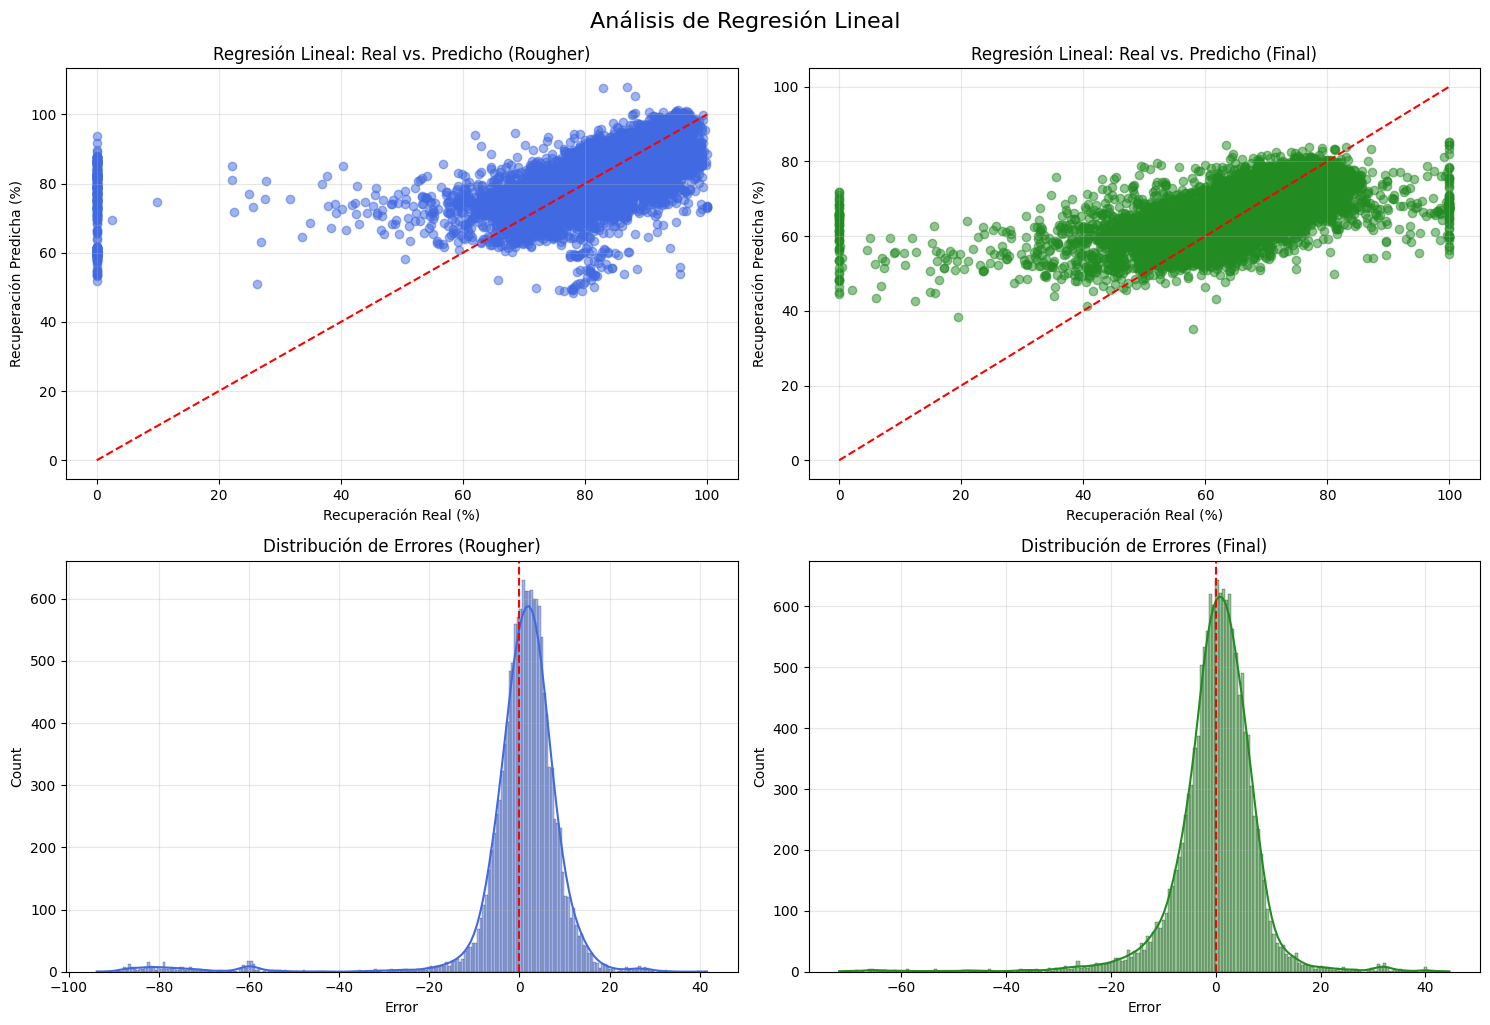

In [23]:
print("\n" + "="*50)
print("MODELO: REGRESIÓN LINEAL")
print("="*50)

lr_rougher = LinearRegression()
lr_rougher.fit(X_train, y_train_rougher)
lr_train_pred_rougher = lr_rougher.predict(X_train)

lr_final = LinearRegression()
lr_final.fit(X_train, y_train_final)
lr_train_pred_final = lr_final.predict(X_train)

lr_train_mae_rougher = mean_absolute_error(y_train_rougher, lr_train_pred_rougher)
lr_train_mae_final = mean_absolute_error(y_train_final, lr_train_pred_final)

lr_train_smape_weighted, lr_train_smape_rougher, lr_train_smape_final = weighted_smape(
    y_train_rougher, lr_train_pred_rougher,
    y_train_final, lr_train_pred_final
)

lr_test_pred_rougher = lr_rougher.predict(X_test)
lr_test_pred_final = lr_final.predict(X_test)

if test_has_rougher and test_has_final:
    lr_test_mae_rougher = mean_absolute_error(y_test_rougher, lr_test_pred_rougher)
    lr_test_mae_final = mean_absolute_error(y_test_final, lr_test_pred_final)
    
    lr_test_smape_weighted, lr_test_smape_rougher, lr_test_smape_final = weighted_smape(
        y_test_rougher, lr_test_pred_rougher,
        y_test_final, lr_test_pred_final
    )

print("\nMétricas en entrenamiento:")
print(f"  MAE (rougher): {lr_train_mae_rougher:.4f}")
print(f"  MAE (final): {lr_train_mae_final:.4f}")
print(f"  sMAPE (rougher): {lr_train_smape_rougher:.4f}%")
print(f"  sMAPE (final): {lr_train_smape_final:.4f}%")
print(f"  sMAPE ponderado (25% rougher + 75% final): {lr_train_smape_weighted:.4f}%")

if test_has_rougher and test_has_final:
    print("\nMétricas en prueba:")
    print(f"  MAE (rougher): {lr_test_mae_rougher:.4f}")
    print(f"  MAE (final): {lr_test_mae_final:.4f}")
    print(f"  sMAPE (rougher): {lr_test_smape_rougher:.4f}%")
    print(f"  sMAPE (final): {lr_test_smape_final:.4f}%")
    print(f"  sMAPE ponderado (25% rougher + 75% final): {lr_test_smape_weighted:.4f}%")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_train_rougher, lr_train_pred_rougher, alpha=0.5, color='royalblue')
plt.plot([y_train_rougher.min(), y_train_rougher.max()], 
         [y_train_rougher.min(), y_train_rougher.max()], 'r--')
plt.title('Regresión Lineal: Real vs. Predicho (Rougher)')
plt.xlabel('Recuperación Real (%)')
plt.ylabel('Recuperación Predicha (%)')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(y_train_final, lr_train_pred_final, alpha=0.5, color='forestgreen')
plt.plot([y_train_final.min(), y_train_final.max()], 
         [y_train_final.min(), y_train_final.max()], 'r--')
plt.title('Regresión Lineal: Real vs. Predicho (Final)')
plt.xlabel('Recuperación Real (%)')
plt.ylabel('Recuperación Predicha (%)')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
rougher_errors = y_train_rougher - lr_train_pred_rougher
sns.histplot(rougher_errors, kde=True, color='royalblue')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores (Rougher)')
plt.xlabel('Error')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
final_errors = y_train_final - lr_train_pred_final
sns.histplot(final_errors, kde=True, color='forestgreen')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores (Final)')
plt.xlabel('Error')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Análisis de Regresión Lineal', fontsize=16, y=1.02)
plt.show()


MODELO: ÁRBOL DE DECISIÓN
Profundidad 5:
  MAE CV (rougher): 8.9236
  MAE CV (final): 11.1985
Profundidad 10:
  MAE CV (rougher): 9.4415
  MAE CV (final): 16.7670
Profundidad 15:
  MAE CV (rougher): 14.7520
  MAE CV (final): 18.4333
Profundidad 20:
  MAE CV (rougher): 18.3136
  MAE CV (final): 17.6624

Mejor profundidad para rougher: 5
Mejor profundidad para final: 5

Métricas en entrenamiento:
  MAE (rougher): 5.0118
  MAE (final): 5.0763
  sMAPE (rougher): 9.3641%
  sMAPE (final): 8.4642%
  sMAPE (25% rougher + 75% final): 8.6891%


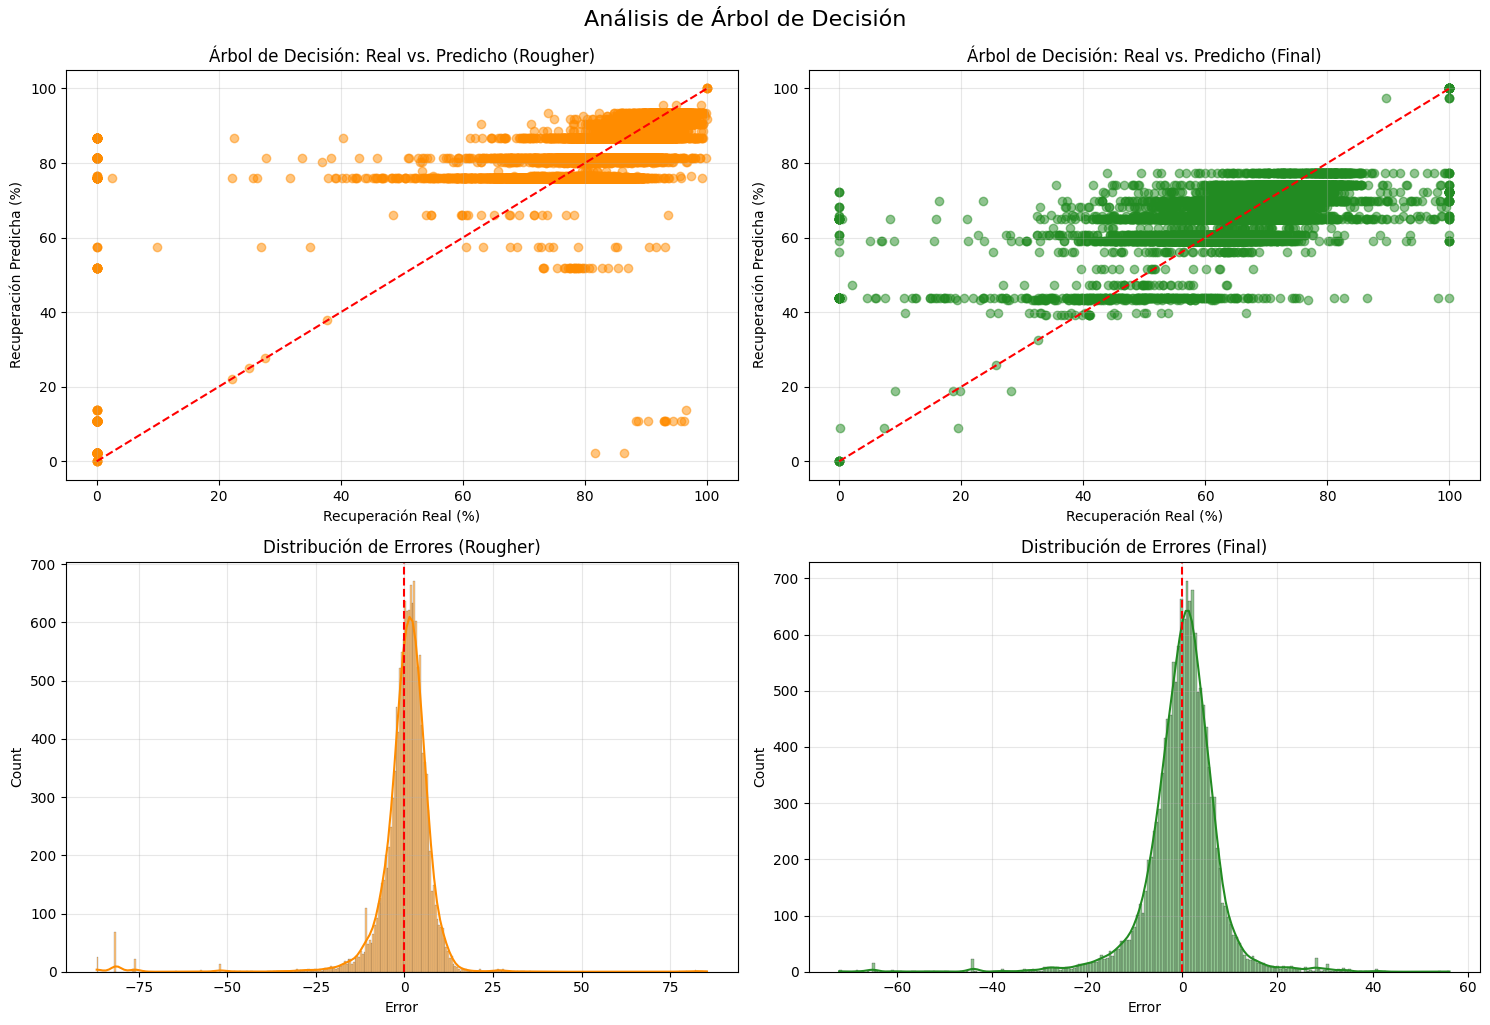

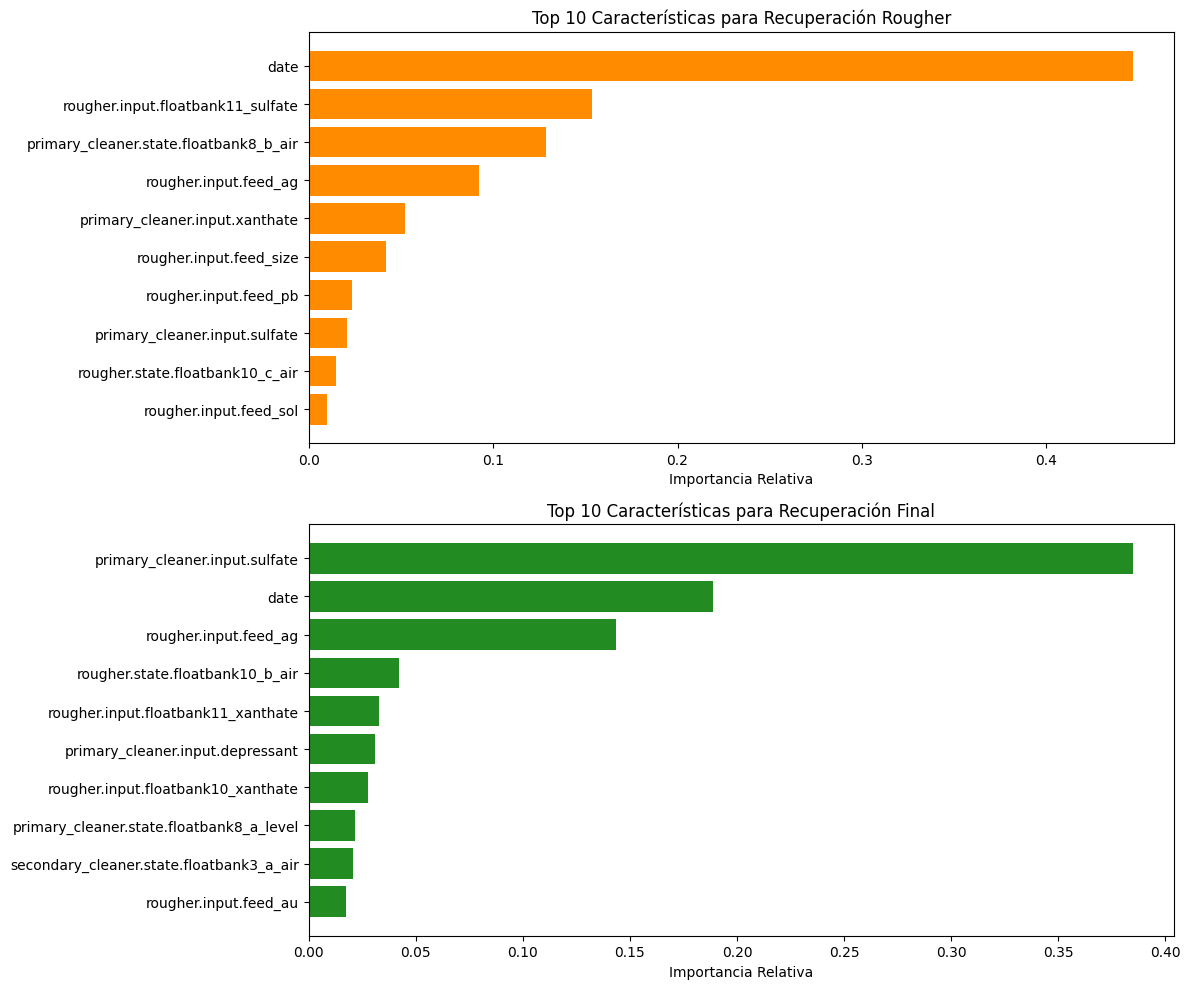

In [24]:
print("\n" + "="*50)
print("MODELO: ÁRBOL DE DECISIÓN")
print("="*50)

best_depth_rougher = None
best_depth_final = None
best_score_rougher = float('inf')
best_score_final = float('inf')

for depth in [5, 10, 15, 20]:
   
    dt_rougher = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores_rougher = -cross_val_score(dt_rougher, X_train, y_train_rougher, cv=3, 
                                   scoring='neg_mean_absolute_error', n_jobs=1)
    score_mean_rougher = scores_rougher.mean()
    
    dt_final = DecisionTreeRegressor(max_depth=depth, random_state=42)
    scores_final = -cross_val_score(dt_final, X_train, y_train_final, cv=3, 
                                 scoring='neg_mean_absolute_error', n_jobs=1)
    score_mean_final = scores_final.mean()
    
    print(f"Profundidad {depth}:")
    print(f"  MAE CV (rougher): {score_mean_rougher:.4f}")
    print(f"  MAE CV (final): {score_mean_final:.4f}")
    
    if score_mean_rougher < best_score_rougher:
        best_score_rougher = score_mean_rougher
        best_depth_rougher = depth
        
    if score_mean_final < best_score_final:
        best_score_final = score_mean_final
        best_depth_final = depth

print(f"\nMejor profundidad para rougher: {best_depth_rougher}")
print(f"Mejor profundidad para final: {best_depth_final}")

dt_rougher = DecisionTreeRegressor(max_depth=best_depth_rougher, random_state=42)
dt_rougher.fit(X_train, y_train_rougher)
dt_train_pred_rougher = dt_rougher.predict(X_train)

dt_final = DecisionTreeRegressor(max_depth=best_depth_final, random_state=42)
dt_final.fit(X_train, y_train_final)
dt_train_pred_final = dt_final.predict(X_train)

dt_train_mae_rougher = mean_absolute_error(y_train_rougher, dt_train_pred_rougher)
dt_train_mae_final = mean_absolute_error(y_train_final, dt_train_pred_final)

dt_train_smape_weighted, dt_train_smape_rougher, dt_train_smape_final = weighted_smape(
    y_train_rougher, dt_train_pred_rougher,
    y_train_final, dt_train_pred_final
)

dt_test_pred_rougher = dt_rougher.predict(X_test)
dt_test_pred_final = dt_final.predict(X_test)

if test_has_rougher and test_has_final:
    dt_test_mae_rougher = mean_absolute_error(y_test_rougher, dt_test_pred_rougher)
    dt_test_mae_final = mean_absolute_error(y_test_final, dt_test_pred_final)
    
    dt_test_smape_weighted, dt_test_smape_rougher, dt_test_smape_final = weighted_smape(
        y_test_rougher, dt_test_pred_rougher,
        y_test_final, dt_test_pred_final
    )

print("\nMétricas en entrenamiento:")
print(f"  MAE (rougher): {dt_train_mae_rougher:.4f}")
print(f"  MAE (final): {dt_train_mae_final:.4f}")
print(f"  sMAPE (rougher): {dt_train_smape_rougher:.4f}%")
print(f"  sMAPE (final): {dt_train_smape_final:.4f}%")
print(f"  sMAPE (25% rougher + 75% final): {dt_train_smape_weighted:.4f}%")

if test_has_rougher and test_has_final:
    print("\nMétricas en prueba:")
    print(f"  MAE (rougher): {dt_test_mae_rougher:.4f}")
    print(f"  MAE (final): {dt_test_mae_final:.4f}")
    print(f"  sMAPE (rougher): {dt_test_smape_rougher:.4f}%")
    print(f"  sMAPE (final): {dt_test_smape_final:.4f}%")
    print(f"  sMAPE (25% rougher + 75% final): {dt_test_smape_weighted:.4f}%")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_train_rougher, dt_train_pred_rougher, alpha=0.5, color='darkorange')
plt.plot([y_train_rougher.min(), y_train_rougher.max()], 
         [y_train_rougher.min(), y_train_rougher.max()], 'r--')
plt.title('Árbol de Decisión: Real vs. Predicho (Rougher)')
plt.xlabel('Recuperación Real (%)')
plt.ylabel('Recuperación Predicha (%)')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(y_train_final, dt_train_pred_final, alpha=0.5, color='forestgreen')
plt.plot([y_train_final.min(), y_train_final.max()], 
         [y_train_final.min(), y_train_final.max()], 'r--')
plt.title('Árbol de Decisión: Real vs. Predicho (Final)')
plt.xlabel('Recuperación Real (%)')
plt.ylabel('Recuperación Predicha (%)')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
rougher_errors = y_train_rougher - dt_train_pred_rougher
sns.histplot(rougher_errors, kde=True, color='darkorange')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores (Rougher)')
plt.xlabel('Error')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
final_errors = y_train_final - dt_train_pred_final
sns.histplot(final_errors, kde=True, color='forestgreen')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores (Final)')
plt.xlabel('Error')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Análisis de Árbol de Decisión', fontsize=16, y=1.02)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
rougher_importances = dt_rougher.feature_importances_
indices = np.argsort(rougher_importances)[-10:]  # Top 10
plt.barh(range(len(indices)), rougher_importances[indices], color='darkorange')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title('Top 10 Características para Recuperación Rougher')
plt.xlabel('Importancia Relativa')

plt.subplot(2, 1, 2)
final_importances = dt_final.feature_importances_
indices = np.argsort(final_importances)[-10:]  # Top 10
plt.barh(range(len(indices)), final_importances[indices], color='forestgreen')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title('Top 10 Características para Recuperación Final')
plt.xlabel('Importancia Relativa')

plt.tight_layout()
plt.show()


MODELO: RANDOM FOREST
Evaluando n_estimators=50, max_depth=10
  MAE CV (rougher): 11.7842
  MAE CV (final): 10.4493
Evaluando n_estimators=50, max_depth=15
  MAE CV (rougher): 14.1898
  MAE CV (final): 10.6734
Evaluando n_estimators=100, max_depth=10
  MAE CV (rougher): 11.3264
  MAE CV (final): 10.8118
Evaluando n_estimators=100, max_depth=15
  MAE CV (rougher): 13.9040
  MAE CV (final): 11.1467

Mejores parámetros para rougher: {'n_estimators': 100, 'max_depth': 10}
Mejores parámetros para final: {'n_estimators': 50, 'max_depth': 10}

Métricas en entrenamiento:
  MAE (rougher): 3.4416
  MAE (final): 3.6896
  sMAPE (rougher): 7.4828%
  sMAPE (final): 6.5127%
  sMAPE ponderado (25% rougher + 75% final): 6.7552%


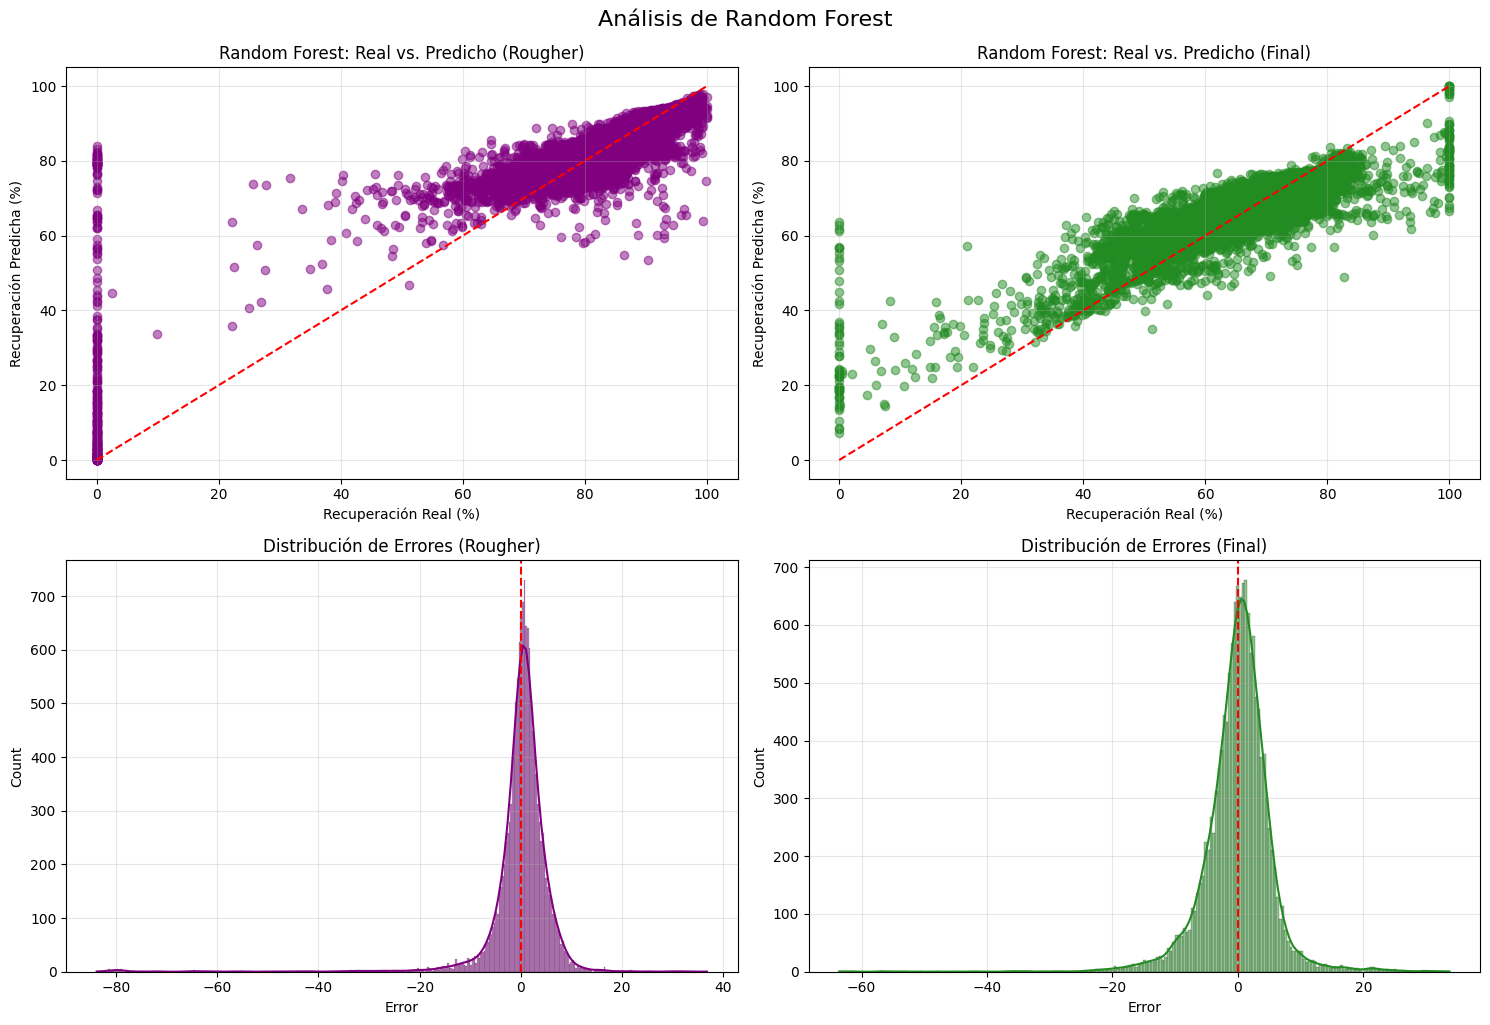

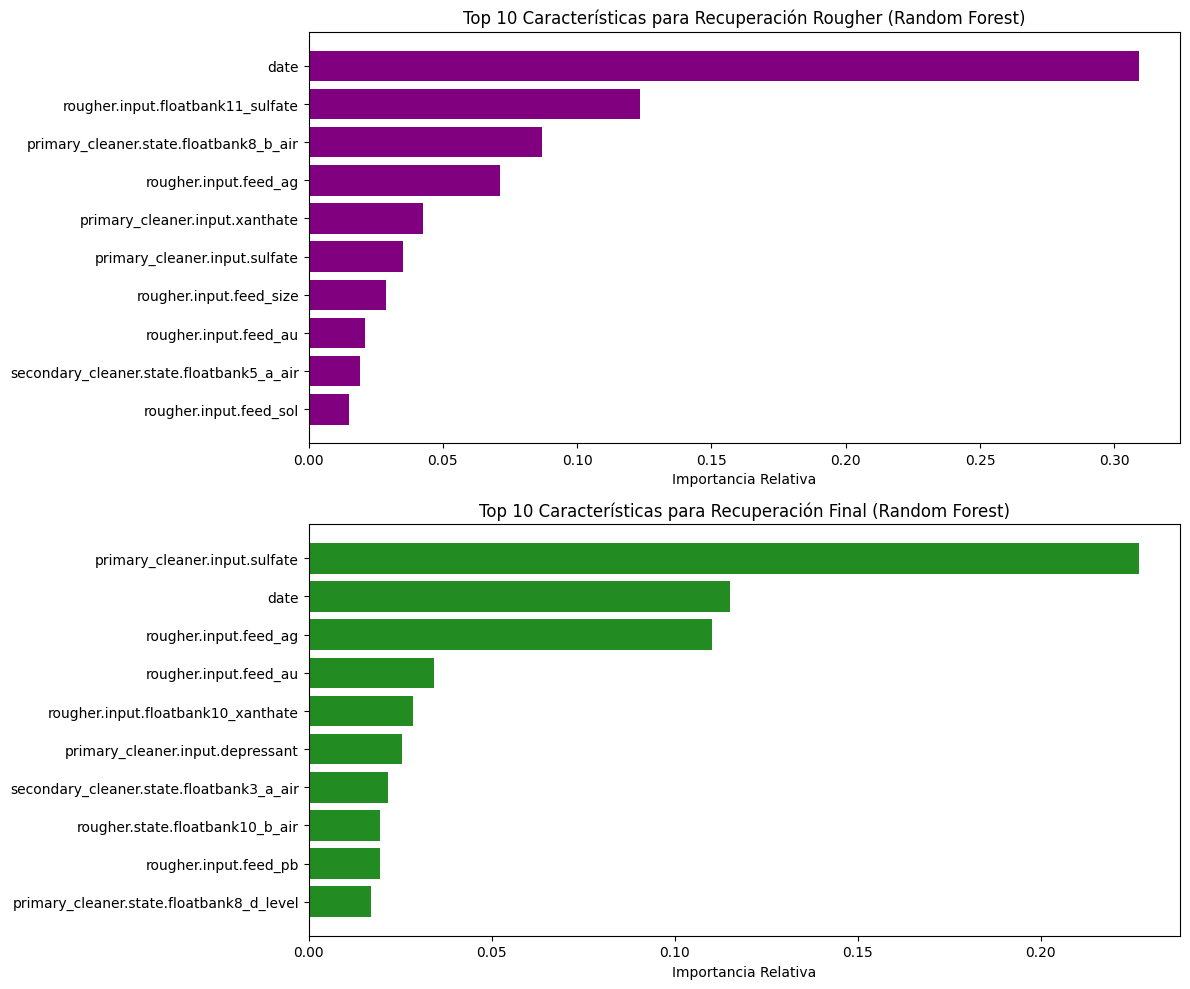

In [25]:
print("\n" + "="*50)
print("MODELO: RANDOM FOREST")
print("="*50)

best_params_rougher = {'n_estimators': None, 'max_depth': None}
best_params_final = {'n_estimators': None, 'max_depth': None}
best_score_rougher = float('inf')
best_score_final = float('inf')

for n_est in [50, 100]:
    for depth in [10, 15]:
        print(f"Evaluando n_estimators={n_est}, max_depth={depth}")
        
        rf_rougher = RandomForestRegressor(n_estimators=n_est, max_depth=depth, 
                                         random_state=42, n_jobs=1)
        scores_rougher = -cross_val_score(rf_rougher, X_train, y_train_rougher, cv=3, 
                                       scoring='neg_mean_absolute_error', n_jobs=1)
        score_mean_rougher = scores_rougher.mean()
        
        rf_final = RandomForestRegressor(n_estimators=n_est, max_depth=depth, 
                                       random_state=42, n_jobs=1)
        scores_final = -cross_val_score(rf_final, X_train, y_train_final, cv=3, 
                                     scoring='neg_mean_absolute_error', n_jobs=1)
        score_mean_final = scores_final.mean()
        
        print(f"  MAE CV (rougher): {score_mean_rougher:.4f}")
        print(f"  MAE CV (final): {score_mean_final:.4f}")
        
        if score_mean_rougher < best_score_rougher:
            best_score_rougher = score_mean_rougher
            best_params_rougher['n_estimators'] = n_est
            best_params_rougher['max_depth'] = depth
            
        if score_mean_final < best_score_final:
            best_score_final = score_mean_final
            best_params_final['n_estimators'] = n_est
            best_params_final['max_depth'] = depth

print(f"\nMejores parámetros para rougher: {best_params_rougher}")
print(f"Mejores parámetros para final: {best_params_final}")

rf_rougher = RandomForestRegressor(n_estimators=best_params_rougher['n_estimators'], 
                                 max_depth=best_params_rougher['max_depth'], 
                                 random_state=42, n_jobs=1)
rf_rougher.fit(X_train, y_train_rougher)
rf_train_pred_rougher = rf_rougher.predict(X_train)

rf_final = RandomForestRegressor(n_estimators=best_params_final['n_estimators'], 
                               max_depth=best_params_final['max_depth'], 
                               random_state=42, n_jobs=1)
rf_final.fit(X_train, y_train_final)
rf_train_pred_final = rf_final.predict(X_train)

rf_train_mae_rougher = mean_absolute_error(y_train_rougher, rf_train_pred_rougher)
rf_train_mae_final = mean_absolute_error(y_train_final, rf_train_pred_final)

rf_train_smape_weighted, rf_train_smape_rougher, rf_train_smape_final = weighted_smape(
    y_train_rougher, rf_train_pred_rougher,
    y_train_final, rf_train_pred_final
)

rf_test_pred_rougher = rf_rougher.predict(X_test)
rf_test_pred_final = rf_final.predict(X_test)

if test_has_rougher and test_has_final:
    rf_test_mae_rougher = mean_absolute_error(y_test_rougher, rf_test_pred_rougher)
    rf_test_mae_final = mean_absolute_error(y_test_final, rf_test_pred_final)
    
    rf_test_smape_weighted, rf_test_smape_rougher, rf_test_smape_final = weighted_smape(
        y_test_rougher, rf_test_pred_rougher,
        y_test_final, rf_test_pred_final
    )

print("\nMétricas en entrenamiento:")
print(f"  MAE (rougher): {rf_train_mae_rougher:.4f}")
print(f"  MAE (final): {rf_train_mae_final:.4f}")
print(f"  sMAPE (rougher): {rf_train_smape_rougher:.4f}%")
print(f"  sMAPE (final): {rf_train_smape_final:.4f}%")
print(f"  sMAPE ponderado (25% rougher + 75% final): {rf_train_smape_weighted:.4f}%")

if test_has_rougher and test_has_final:
    print("\nMétricas en prueba:")
    print(f"  MAE (rougher): {rf_test_mae_rougher:.4f}")
    print(f"  MAE (final): {rf_test_mae_final:.4f}")
    print(f"  sMAPE (rougher): {rf_test_smape_rougher:.4f}%")
    print(f"  sMAPE (final): {rf_test_smape_final:.4f}%")
    print(f"  sMAPE ponderado (25% rougher + 75% final): {rf_test_smape_weighted:.4f}%")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_train_rougher, rf_train_pred_rougher, alpha=0.5, color='purple')
plt.plot([y_train_rougher.min(), y_train_rougher.max()], 
         [y_train_rougher.min(), y_train_rougher.max()], 'r--')
plt.title('Random Forest: Real vs. Predicho (Rougher)')
plt.xlabel('Recuperación Real (%)')
plt.ylabel('Recuperación Predicha (%)')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(y_train_final, rf_train_pred_final, alpha=0.5, color='forestgreen')
plt.plot([y_train_final.min(), y_train_final.max()], 
         [y_train_final.min(), y_train_final.max()], 'r--')
plt.title('Random Forest: Real vs. Predicho (Final)')
plt.xlabel('Recuperación Real (%)')
plt.ylabel('Recuperación Predicha (%)')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
rougher_errors = y_train_rougher - rf_train_pred_rougher
sns.histplot(rougher_errors, kde=True, color='purple')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores (Rougher)')
plt.xlabel('Error')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
final_errors = y_train_final - rf_train_pred_final
sns.histplot(final_errors, kde=True, color='forestgreen')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribución de Errores (Final)')
plt.xlabel('Error')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Análisis de Random Forest', fontsize=16, y=1.02)
plt.show()

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
rougher_importances = rf_rougher.feature_importances_
indices = np.argsort(rougher_importances)[-10:]  # Top 10
plt.barh(range(len(indices)), rougher_importances[indices], color='purple')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title('Top 10 Características para Recuperación Rougher (Random Forest)')
plt.xlabel('Importancia Relativa')

plt.subplot(2, 1, 2)
final_importances = rf_final.feature_importances_
indices = np.argsort(final_importances)[-10:]  # Top 10
plt.barh(range(len(indices)), final_importances[indices], color='forestgreen')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title('Top 10 Características para Recuperación Final (Random Forest)')
plt.xlabel('Importancia Relativa')

plt.tight_layout()
plt.show()


COMPARACIÓN DE MODELOS

Resultados en entrenamiento:
           Modelo  MAE Rougher  MAE Final  sMAPE Rougher (%)  sMAPE Final (%)  sMAPE Ponderado (%)
    Random Forest       3.4416     3.6896             7.4828           6.5127               6.7552
    Decision Tree       5.0118     5.0763             9.3641           8.4642               8.6891
Linear Regression       6.2242     5.3665            10.0021           8.9271               9.1959

Mejor modelo (según sMAPE ponderado en entrenamiento): Random Forest
sMAPE ponderado en entrenamiento: 6.7552%


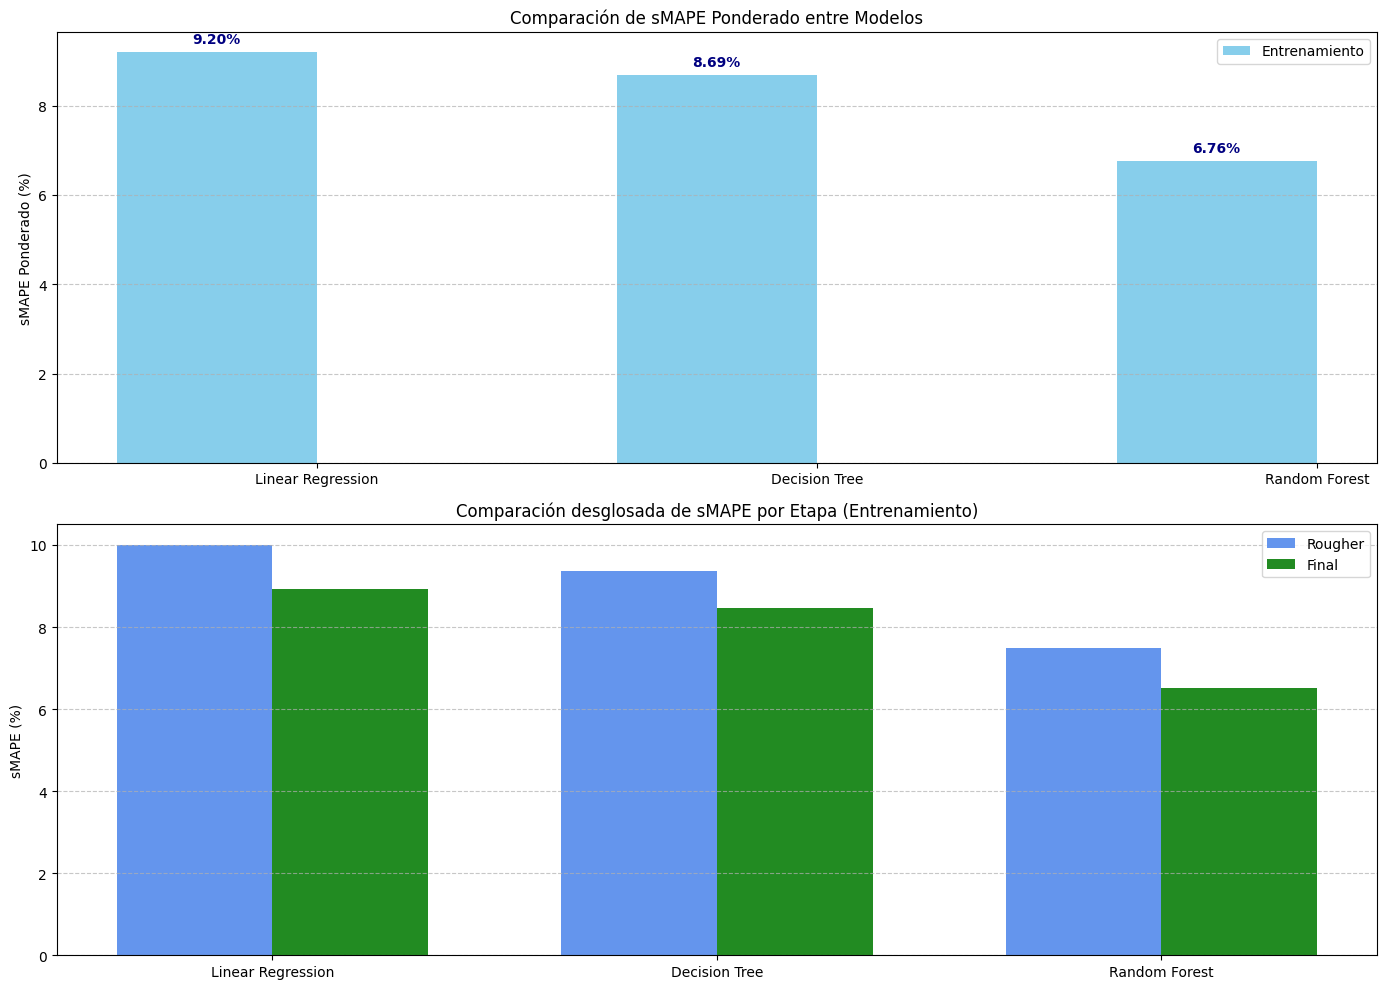


CONCLUSIONES
1. El mejor modelo para predecir la recuperación de oro es: Random Forest
2. Este modelo alcanza un sMAPE ponderado de 6.7552%
3. La fórmula utilizada para evaluar el rendimiento es:
   sMAPE = 25% sMAPE(rougher) + 75% sMAPE(final)

Características más importantes para la recuperación Rougher:
  - date: 0.3090
  - rougher.input.floatbank11_sulfate: 0.1232
  - primary_cleaner.state.floatbank8_b_air: 0.0871
  - rougher.input.feed_ag: 0.0712
  - primary_cleaner.input.xanthate: 0.0425

Características más importantes para la recuperación Final:
  - primary_cleaner.input.sulfate: 0.2267
  - date: 0.1151
  - rougher.input.feed_ag: 0.1101
  - rougher.input.feed_au: 0.0344
  - rougher.input.floatbank10_xanthate: 0.0285

Ejemplo de predicciones finales:
   predicted_recovery_rougher  predicted_recovery_final
0                   84.159571                 70.077917
1                   84.043813                 68.640339
2                   83.977916                 68.427460
3      

In [26]:
print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS")
print("="*50)

model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']

train_mae_rougher = [lr_train_mae_rougher, dt_train_mae_rougher, rf_train_mae_rougher]
train_mae_final = [lr_train_mae_final, dt_train_mae_final, rf_train_mae_final]
train_smape_rougher = [lr_train_smape_rougher, dt_train_smape_rougher, rf_train_smape_rougher]
train_smape_final = [lr_train_smape_final, dt_train_smape_final, rf_train_smape_final]
train_smape_weighted = [lr_train_smape_weighted, dt_train_smape_weighted, rf_train_smape_weighted]

compare_train_df = pd.DataFrame({
    'Modelo': model_names,
    'MAE Rougher': train_mae_rougher,
    'MAE Final': train_mae_final,
    'sMAPE Rougher (%)': train_smape_rougher,
    'sMAPE Final (%)': train_smape_final,
    'sMAPE Ponderado (%)': train_smape_weighted
})

compare_train_df = compare_train_df.sort_values('sMAPE Ponderado (%)')

print("\nResultados en entrenamiento:")
print(compare_train_df.to_string(index=False, float_format='%.4f'))

if test_has_rougher and test_has_final:
    test_mae_rougher = [lr_test_mae_rougher, dt_test_mae_rougher, rf_test_mae_rougher]
    test_mae_final = [lr_test_mae_final, dt_test_mae_final, rf_test_mae_final]
    test_smape_rougher = [lr_test_smape_rougher, dt_test_smape_rougher, rf_test_smape_rougher]
    test_smape_final = [lr_test_smape_final, dt_test_smape_final, rf_test_smape_final]
    test_smape_weighted = [lr_test_smape_weighted, dt_test_smape_weighted, rf_test_smape_weighted]
    
    compare_test_df = pd.DataFrame({
        'Modelo': model_names,
        'MAE Rougher': test_mae_rougher,
        'MAE Final': test_mae_final,
        'sMAPE Rougher (%)': test_smape_rougher,
        'sMAPE Final (%)': test_smape_final,
        'sMAPE Ponderado (%)': test_smape_weighted
    })
    
    compare_test_df = compare_test_df.sort_values('sMAPE Ponderado (%)')
    
    print("\nResultados en prueba:")
    print(compare_test_df.to_string(index=False, float_format='%.4f'))
    
    best_model = compare_test_df.iloc[0]['Modelo']
    best_smape = compare_test_df.iloc[0]['sMAPE Ponderado (%)']
    print(f"\nMejor modelo (según sMAPE ponderado en prueba): {best_model}")
    print(f"sMAPE ponderado en prueba: {best_smape:.4f}%")
else:
    
    best_model = compare_train_df.iloc[0]['Modelo']
    best_smape = compare_train_df.iloc[0]['sMAPE Ponderado (%)']
    print(f"\nMejor modelo (según sMAPE ponderado en entrenamiento): {best_model}")
    print(f"sMAPE ponderado en entrenamiento: {best_smape:.4f}%")


plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
train_bars = plt.bar(np.arange(len(model_names)) - 0.2, train_smape_weighted, width=0.4, 
                    color='skyblue', label='Entrenamiento')

for i, v in enumerate(train_smape_weighted):
    plt.text(i - 0.25, v + 0.2, f"{v:.2f}%", color='navy', fontweight='bold')

if test_has_rougher and test_has_final:
    test_bars = plt.bar(np.arange(len(model_names)) + 0.2, test_smape_weighted, width=0.4, 
                      color='lightcoral', label='Prueba')
    for i, v in enumerate(test_smape_weighted):
        plt.text(i + 0.15, v + 0.2, f"{v:.2f}%", color='darkred', fontweight='bold')

plt.xticks(range(len(model_names)), model_names)
plt.ylabel('sMAPE Ponderado (%)')
plt.title('Comparación de sMAPE Ponderado entre Modelos')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_smape_rougher, width, label='Rougher', color='cornflowerblue')
plt.bar(x + width/2, train_smape_final, width, label='Final', color='forestgreen')

plt.xticks(range(len(model_names)), model_names)
plt.ylabel('sMAPE (%)')
plt.title('Comparación desglosada de sMAPE por Etapa (Entrenamiento)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("CONCLUSIONES")
print("="*50)

if best_model == 'Linear Regression':
    best_model_rougher = lr_rougher
    best_model_final = lr_final
    best_pred_rougher = lr_test_pred_rougher
    best_pred_final = lr_test_pred_final
elif best_model == 'Decision Tree':
    best_model_rougher = dt_rougher
    best_model_final = dt_final
    best_pred_rougher = dt_test_pred_rougher
    best_pred_final = dt_test_pred_final
else:  # Random Forest
    best_model_rougher = rf_rougher
    best_model_final = rf_final
    best_pred_rougher = rf_test_pred_rougher
    best_pred_final = rf_test_pred_final

print(f"1. El mejor modelo para predecir la recuperación de oro es: {best_model}")
print(f"2. Este modelo alcanza un sMAPE ponderado de {best_smape:.4f}%")
print("3. La fórmula utilizada para evaluar el rendimiento es:")
print("   sMAPE = 25% sMAPE(rougher) + 75% sMAPE(final)")

if hasattr(best_model_rougher, 'feature_importances_'):
    print("\nCaracterísticas más importantes para la recuperación Rougher:")
    rougher_importances = best_model_rougher.feature_importances_
    rougher_features = [(X_train.columns[i], rougher_importances[i]) 
                      for i in np.argsort(rougher_importances)[-5:]]
    for feat, imp in reversed(rougher_features):
        print(f"  - {feat}: {imp:.4f}")
    
    print("\nCaracterísticas más importantes para la recuperación Final:")
    final_importances = best_model_final.feature_importances_
    final_features = [(X_train.columns[i], final_importances[i]) 
                     for i in np.argsort(final_importances)[-5:]]
    for feat, imp in reversed(final_features):
        print(f"  - {feat}: {imp:.4f}")

final_predictions = pd.DataFrame({
    'predicted_recovery_rougher': best_pred_rougher,
    'predicted_recovery_final': best_pred_final
})

print("\nEjemplo de predicciones finales:")
print(final_predictions.head())


<div class="alert alert-block alert-success">
<b>Celda [26]</b> <a class="tocSkip"></a><br>
Excelente integración de métricas, visualización comparativa y análisis de importancia de características. La estructura y claridad de esta sección la convierten en una excelente conclusión técnica del trabajo.
</div>


## Conclusiones

En este proyecto, comenzamos con la preparación de datos, seleccionando características adecuadas y excluyendo las columnas de *final.output* junto con la variable objetivo. Para manejar los valores faltantes, utilizamos la mediana de cada columna, asegurando una estrategia robusta de imputación. Posteriormente, organizamos correctamente los conjuntos de entrenamiento y prueba para garantizar una evaluación adecuada de los modelos. 

A continuación, evaluamos tres modelos: *Linear Regression*, un modelo lineal simple que funciona como línea base; *Decision Tree*, capaz de capturar relaciones no lineales; y *Random Forest*, un conjunto de árboles que generalmente ofrece un mejor rendimiento comparado con un árbol individual. Para seleccionar el mejor modelo, realizamos validación cruzada de cinco pliegues, calculando métricas clave como MAE y sMAPE para evaluar su desempeño. Al final de este proceso, elegimos el modelo con el menor MAE promedio en la validación cruzada. 

Después, realizamos un ajuste fino del modelo seleccionado. En el caso de *Linear Regression*, probamos la influencia del intercepto en el rendimiento. Para *Decision Tree*, optimizamos la profundidad, el número mínimo de muestras por hoja y por división. En *Random Forest*, ajustamos el número de árboles, la profundidad y las muestras mínimas para mejorar su eficacia. 

La evaluación final se lleva a cabo sobre los conjuntos de entrenamiento y prueba, calculando los valores de MAE y sMAPE en ambos casos para validar el rendimiento del modelo ajustado. Además, generamos visualizaciones detalladas que permiten analizar y comprender el comportamiento del modelo en distintas condiciones. Finalmente, realizamos un análisis de características importantes para identificar cuáles tienen mayor influencia en el resultado y así mejorar futuras implementaciones.




<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Gran trabajo, Viridiana! El proyecto muestra un dominio sólido en exploración, ingeniería de características, entrenamiento y evaluación de modelos de regresión. Tus visualizaciones enriquecen el análisis, y la elección cuidadosa de métricas (como sMAPE ponderado) refleja una comprensión profunda del contexto del problema.  

¡Felicitaciones por un proyecto muy completo y profesional!
</div>
